## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [3]:
your_name = "Yajur Bhardwaj"
your_student_id = "48682764"

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [13]:
csv_filename = "Data/car_sells_clean_data.csv"
car_data = pd.read_csv(csv_filename)
# to display the cleaned car dataset
car_data.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
# to print out the length of the cleaned car sell dataset.

Total_length_dataset = car_data.shape[0]
print(Total_length_dataset)

3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [16]:
# To print the few rows and column of our cleaned car sell dataset with the use of head() method.
Car_Sales_Data_Head = car_data.head()
Car_Sales_Data_Head


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [17]:
# To print the information and to have a rough picture about the dataset.
Car_Sales_Data_Info = car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


In [32]:

from sklearn.preprocessing import OrdinalEncoder


# To initialize the OrdinalEncoder object for handling categorical data
encoder = OrdinalEncoder()

# To specify which columns in the DataFrame are categorical and need encoding
features_to_encode = ['seller_type', 'fuel', 'owner']

# To apply the encoder to these columns and transform the categorical values into numerical ones
transformed_features = encoder.fit_transform(car_data[features_to_encode])

# To drop the original categorical columns from the DataFrame, preparing for merging the encoded values
data_without_categorical = car_data.drop(columns=features_to_encode)

# To combine the transformed numerical data with the remaining non-categorical data
encoded_frame = pd.concat([
    data_without_categorical,  # DataFrame without the original categorical columns
    pd.DataFrame(transformed_features, columns=features_to_encode)  # DataFrame with encoded numerical data
], axis=1)

# To display the DataFrame with the encoded categorical data included
encoded_frame





,name,year,selling_price,km_driven,transmission,seller_type,fuel,owner
0,Maruti 800 AC,2007.0,60000,70000,Manual,1.0,1.0,0.0
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Manual,1.0,1.0,0.0
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Manual,1.0,0.0,0.0
3,Datsun RediGO T Option,2017.0,250000,46000,Manual,1.0,1.0,0.0
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Manual,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
3652,Hyundai i20 Magna 1.4 CRDi (Diesel),2014.0,409999,80000,Manual,1.0,0.0,1.0
3653,Hyundai i20 Magna 1.4 CRDi,2014.0,409999,80000,Manual,1.0,0.0,1.0
3654,Maruti 800 AC BSIII,2009.0,110000,83000,Manual,1.0,1.0,1.0
3655,Hyundai Creta 1.6 CRDi SX Option,2016.0,865000,90000,Manual,1.0,0.0,0.0


In [68]:
# To specify which columns we want to analyze
desired_columns  = ['year', 'km_driven', 'seller_type', 'fuel', 'owner', 'selling_price']

# To extract only the relevant columns from the dataset
selected_data = encoded_frame[desired_columns]

# To ensure the correlation matrix is accurate by removing any rows with missing data
clean_data = selected_data.dropna()

# To calculate the correlation matrix for the cleaned dataset
correlations = clean_data.corr()

# To view the computed correlations between the selected columns
print(correlations)


                   year  km_driven  seller_type      fuel     owner  \
year           1.000000  -0.404058    -0.139135 -0.118542 -0.433406   
km_driven     -0.404058   1.000000     0.147376 -0.297764  0.306730   
seller_type   -0.139135   0.147376     1.000000  0.036755  0.239288   
fuel          -0.118542  -0.297764     0.036755  1.000000 -0.017217   
owner         -0.433406   0.306730     0.239288 -0.017217  1.000000   
selling_price  0.411103  -0.177203    -0.208637 -0.277627 -0.205524   

               selling_price  
year                0.411103  
km_driven          -0.177203  
seller_type        -0.208637  
fuel               -0.277627  
owner              -0.205524  
selling_price       1.000000  


In [101]:
# To extract the correlation values related to 'selling_price'
selling_price_correlation_values = correlations['selling_price']

#To convert the values of correlation coefficients to an absolute number for further use  and sorting them in ascending order.
selling_price_correlation_abs_values = selling_price_correlation_values.abs().sort_values()

# To display the correlation values for 'selling_price'
print(selling_price_correlation_values)

# to display the absolute values as well
print(selling_price_correlation_abs_values)



year             0.411103
km_driven       -0.177203
seller_type     -0.208637
fuel            -0.277627
owner           -0.205524
selling_price    1.000000
Name: selling_price, dtype: float64
km_driven        0.177203
owner            0.205524
seller_type      0.208637
fuel             0.277627
year             0.411103
selling_price    1.000000
Name: selling_price, dtype: float64


In [70]:
# To specify the columns I want to analyze
desired_columns = ['year', 'km_driven', 'seller_type', 'fuel', 'owner', 'selling_price']

# To calculate the correlation matrix for the selected columns
correl_matrix = encoded_frame[desired_columns].corr()

# To view the correlation matrix and understand the relationships between variables

correl_matrix


,year,km_driven,seller_type,fuel,owner,selling_price
year,1.000000,-0.404058,-0.139135,-0.118542,-0.433406,0.411103
km_driven,-0.404058,1.000000,0.147376,-0.297764,0.306730,-0.177203
seller_type,-0.139135,0.147376,1.000000,0.036755,0.239288,-0.208637
fuel,-0.118542,-0.297764,0.036755,1.000000,-0.017217,-0.277627
owner,-0.433406,0.306730,0.239288,-0.017217,1.000000,-0.205524
selling_price,0.411103,-0.177203,-0.208637,-0.277627,-0.205524,1.000000



## In-Depth Examination of Feature Correlations with Selling Price

#### Features Most Strongly Associated with Selling Price

1. **Year** (`0.411103`)
   - **Absolute Correlation**: `0.411103`
   - **Explanation**: The `year` feature exhibits a moderate to strong positive correlation with `selling_price`. This indicates that newer vehicles generally fetch higher prices. Specifically, for each additional year in the vehicle's age, the selling price tends to increase by approximately 0.41. This relationship underscores the higher value placed on newer models.

2. **Fuel** (`-0.277627`)
   - **Absolute Correlation**: `0.277627`
   - **Explanation**: The `fuel` feature shows a moderate negative correlation with `selling_price`. This suggests that different types of fuel have a noticeable impact on the vehicle’s price, with some fuel types potentially leading to lower prices. Vehicles using less common fuel types may be priced lower due to reduced demand.

#### Features Least Associated with Selling Price

1. **Kilometers Driven** (`-0.177203`)
   - **Absolute Correlation**: `0.177203`
   - **Explanation**: The correlation between `km_driven` and `selling_price` is weakly negative. This means that higher mileage is only slightly associated with lower prices. For instance, an increase of 10,000 kilometers in mileage may result in a minor decrease in price. However, the impact of mileage on price is relatively limited.

2. **Owner** (`-0.205524`)
   - **Absolute Correlation**: `0.205524`
   - **Explanation**: The `owner` feature shows a weak negative correlation with `selling_price`. This implies that vehicles with more previous owners are generally associated with slightly lower prices. Each additional owner might cause a minor reduction in the vehicle's price, but the effect is not substantial.

3. **Seller Type** (`-0.208637`)
   - **Absolute Correlation**: `0.208637`
   - **Explanation**: The `seller_type` feature has a weak negative correlation with `selling_price`. This indicates that the type of seller (such as a dealer versus such as a dealer versus an individual) has a small effect on the price. While seller type can influence the selling price, its impact is relatively minor.
 ### Impact on Regression Modeling

- **Highly Correlated Features**:
  - **Year**: With its strong positive correlation, `year` is a crucial feature for predicting selling price. Including `year` in the model will likely improve its accuracy significantly.
  - **Fuel**: The moderate correlation of `fuel` suggests it should be included in the model as it has a noticeable impact on price.

- **Less Correlated Features**:
  - **Kilometers Driven**: The weak negative correlation indicates that this feature has limited predictive power. It may be included in the model but its effect will be minimal.
  - **Owner**: Similarly, the weak correlation suggests that `owner` contributes only a small amount to the prediction of selling price.
  - **Seller Type**: With the lowest correlation, `seller_type` might have a minimal impact on the model and could be excluded unless specific contextual factors make it relevant.








### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [53]:

# To define the dataset I am working with
data = encoded_frame  

# Case 1
# To split the data with 10% allocated for training and 90% for testing
train_data_10, test_data_10 = train_test_split(data, test_size=0.90, random_state=42)

# To check the shape of the training and testing sets for the 10% training data scenario
print("For 10% Training Data:")
print("Training Data Shape:", train_data_10.shape)
print("Testing Data Shape:", test_data_10.shape)

# Case 2
# To split the data with 90% allocated for training and 10% for testing
train_data_90, test_data_90 = train_test_split(data, test_size=0.10, random_state=42)

# To check the shape of the training and testing sets for the 90% training data scenario
print("For 90% Training Data:")
print("Training Data Shape:", train_data_90.shape)
print("Testing Data Shape:", test_data_90.shape)


Case 1 - Training set shape: (365, 8)
Case 1 - Testing set shape: (3292, 8)
Case 2 - Training set shape: (3291, 8)
Case 2 - Testing set shape: (366, 8)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# To identify the most and least correlated features with 'selling_price' and to drop 'selling_price' from the correlation matrix.
selling_price_corr = selling_price_correlation_abs_values.drop('selling_price')

# To select the two features that are most and least correlated with 'selling_price'
most_correlated_features = selling_price_corr.nlargest(2).index.tolist()
least_correlated_features = selling_price_corr.nsmallest(2).index.tolist()

# To display the selected features
print("Most correlated features:", most_correlated_features)
print("Least correlated features:", least_correlated_features)

# To define a function that trains a linear regression model and computes Mean Squared Error and R² score
def train_and_evaluate(features, train_set, test_set):
    # To prepare training and testing data based on the selected features
    X_train = train_set[features]
    y_train = train_set['selling_price']
    X_test = test_set[features]
    y_test = test_set['selling_price']
    
    # To initialize the linear regression model
    model = LinearRegression()
    # To fit the model with the training data
    model.fit(X_train, y_train)
    
    # To make predictions using the test data
    predictions = model.predict(X_test)
    
    # To calculate the Mean Squared Error and R² score
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return model, mse, r2

# To train and evaluate models under various conditions

# Model 1: Using the most correlated features on the smaller training set
model_1, mse_1, r2_1 = train_and_evaluate(most_correlated_features, train_data_10, test_data_10)

# Model 2: Using the least correlated features on the smaller training set
model_2, mse_2, r2_2 = train_and_evaluate(least_correlated_features, train_data_10, test_data_10)

# Model 3: Using the most correlated features on the larger training set
model_3, mse_3, r2_3 = train_and_evaluate(most_correlated_features, train_data_90, test_data_90)

# Model 4: Using the least correlated features on the larger training set
model_4, mse_4, r2_4 = train_and_evaluate(least_correlated_features, train_data_90, test_data_90)

# To print Mean Squared Error and R² score results for each model to compare performance
print(f"Model 1 (Most correlated, smaller set) MSE: {mse_1}, R²: {r2_1}")
print(f"Model 2 (Least correlated, smaller set) MSE: {mse_2}, R²: {r2_2}")
print(f"Model 3 (Most correlated, larger set) MSE: {mse_3}, R²: {r2_3}")
print(f"Model 4 (Least correlated, larger set) MSE: {mse_4}, R²: {r2_4}")

# To assess the impact of training set size and feature selection on model performance
print(f"Impact of data size on performance (Most correlated) MSE: {mse_1 - mse_3}, R²: {r2_1 - r2_3}")
print(f"Impact of feature selection (Most vs Least correlated, smaller set) MSE: {mse_1 - mse_2}, R²: {r2_1 - r2_2}")
print(f"Impact of feature selection (Most vs Least correlated, larger set) MSE: {mse_3 - mse_4}, R²: {r2_3 - r2_4}")



Most correlated features: ['year', 'fuel']
Least correlated features: ['km_driven', 'owner']
Model 1 (Most correlated, smaller set) MSE: 240873725575.09454, R²: 0.2043619078459994
Model 2 (Least correlated, smaller set) MSE: 292715789614.6963, R²: 0.033120645116682
Model 3 (Most correlated, larger set) MSE: 141350876932.57748, R²: 0.31973677172905757
Model 4 (Least correlated, larger set) MSE: 195254216561.59534, R²: 0.06032232290246076
Impact of data size on performance (Most correlated) MSE: 99522848642.51706, R²: -0.11537486388305818
Impact of feature selection (Most vs Least correlated, smaller set) MSE: -51842064039.601746, R²: 0.1712412627293174
Impact of feature selection (Most vs Least correlated, larger set) MSE: -53903339629.01785, R²: 0.2594144488265968


### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [114]:

# To define a function to train a linear regression model and evaluate its performance
def train_and_evaluate(features, train_set, test_set):
    # To extract the feature columns and target values from the training set
    X_train = train_set[features]
    y_train = train_set['selling_price']
    
    # To extract the feature columns and target values from the test set
    X_test = test_set[features]
    y_test = test_set['selling_price']
    
    # To initialize a Linear Regression model
    model = LinearRegression()
    
    # To fit the model on the training data
    model.fit(X_train, y_train)
    
    # To predict target values for the test data
    predictions = model.predict(X_test)
    
    # To compute the Mean Squared Error (MSE) between the true values and the predictions
    mse = mean_squared_error(y_test, predictions)
    
    # To compute the Root Mean Squared Error (RMSE) from the MSE
    rmse = np.sqrt(mse)
    
    # To return the trained model and performance metrics
    return model, mse, rmse

# To evaluate performance with different sets of features and data sizes

# To train using the most correlated features on a smaller training set
model_1, mse_1, rmse_1 = train_and_evaluate(most_correlated_features, train_data_10, test_data_10)

# To train using the least correlated features on the same smaller training set
model_2, mse_2, rmse_2 = train_and_evaluate(least_correlated_features, train_data_10, test_data_10)

# To train using the most correlated features on a larger training set
model_3, mse_3, rmse_3 = train_and_evaluate(most_correlated_features, train_data_90, test_data_90)

# To train using the least correlated features on the larger training set
model_4, mse_4, rmse_4 = train_and_evaluate(least_correlated_features, train_data_90, test_data_90)

# To print out the performance metrics for each model for comparison
print(f"Model 1 (Most correlated features, smaller set) MSE: {mse_1}, RMSE: {rmse_1}")
print(f"Model 2 (Least correlated features, smaller set) MSE: {mse_2}, RMSE: {rmse_2}")
print(f"Model 3 (Most correlated features, larger set) MSE: {mse_3}, RMSE: {rmse_3}")
print(f"Model 4 (Least correlated features, larger set) MSE: {mse_4}, RMSE: {rmse_4}")

# To analyze the impact of the training set size on model performance
print(f"Impact of training size on most correlated features: MSE Difference: {mse_1 - mse_3}, RMSE Difference: {rmse_1 - rmse_3}")
print(f"Impact of training size on least correlated features: MSE Difference: {mse_2 - mse_4}, RMSE Difference: {rmse_2 - rmse_4}")

# To analyze the impact of feature selection on model performance
print(f"Impact of feature selection (small set): MSE Difference: {mse_1 - mse_2}, RMSE Difference: {rmse_1 - rmse_2}")
print(f"Impact of feature selection (large set): MSE Difference: {mse_3 - mse_4}, RMSE Difference: {rmse_3 - rmse_4}")


Model 1 (Most correlated features, smaller set) MSE: 240873725575.09454, RMSE: 490788.8808592698
Model 2 (Least correlated features, smaller set) MSE: 292715789614.6963, RMSE: 541032.152108076
Model 3 (Most correlated features, larger set) MSE: 141350876932.57748, RMSE: 375966.5901813318
Model 4 (Least correlated features, larger set) MSE: 195254216561.59534, RMSE: 441875.7931382928
Impact of training size on most correlated features: MSE Difference: 99522848642.51706, RMSE Difference: 114822.29067793803
Impact of training size on least correlated features: MSE Difference: 97461573053.10095, RMSE Difference: 99156.35896978324
Impact of feature selection (small set): MSE Difference: -51842064039.601746, RMSE Difference: -50243.27124880621
Impact of feature selection (large set): MSE Difference: -53903339629.01785, RMSE Difference: -65909.202956961


## Model Performance Evaluation

### **Performance Metrics**

1. **Model 1: Most Correlated Features, Smaller Training Set**
   - **MSE:** 240,873,725,575.09
   - **RMSE:** 490,788.88

2. **Model 2: Least Correlated Features, Smaller Training Set**
   - **MSE:** 292,715,789,614.70
   - **RMSE:** 541,032.15

3. **Model 3: Most Correlated Features, Larger Training Set**
   - **MSE:** 141,350,876,932.58
   - **RMSE:** 375,966.59

4. **Model 4: Least Correlated Features, Larger Training Set**
   - **MSE:** 195,254,216,561.60
   - **RMSE:** 441,875.79

### **Impact of Training Set Size**

- **Most Correlated Features:**
  - **MSE Improvement:** 99,522,848,642.52
  - **RMSE Improvement:** 114,822.29
  - **Insight:** Utilizing a larger training set results in substantial performance enhancements when using the most correlated features. Both MSE and RMSE show significant improvement.

- **Least Correlated Features:**
  - **MSE Improvement:** 97,461,573,053.10
  - **RMSE Improvement:** 99,156.36
  - **Insight:** While performance also improves with a larger training set for least correlated features, the gains are less dramatic compared to the most correlated features.

### **Impact of Feature Selection**

- **Smaller Training Set:**
  - **MSE Difference:** -51,842,064,039.60
  - **RMSE Difference:** -50,243.27
  - **Insight:** On a smaller training set, models using the most correlated features demonstrate better performance compared to those using the least correlated features, reflected in lower MSE and RMSE.

- **Larger Training Set:**
  - **MSE Difference:** -53,903,339,629.02
  - **RMSE Difference:** -65,909.20
  - **Insight:** The trend continues with a larger training set, where the most correlated features again yield superior performance in both MSE and RMSE compared to the least correlated features.

### **Summary**

- **Training Set Size:** Expanding the training set typically enhances model performance, with the most notable improvements occurring when leveraging the most correlated features.
- **Feature Selection:** Consistently, models using the most correlated features outperform those using the least correlated features in both training set sizes, as evidenced by better MSE and RMSE results.

This analysis underscores the significant impact of both feature selection and training set size on the efficacy of linear regression models.


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

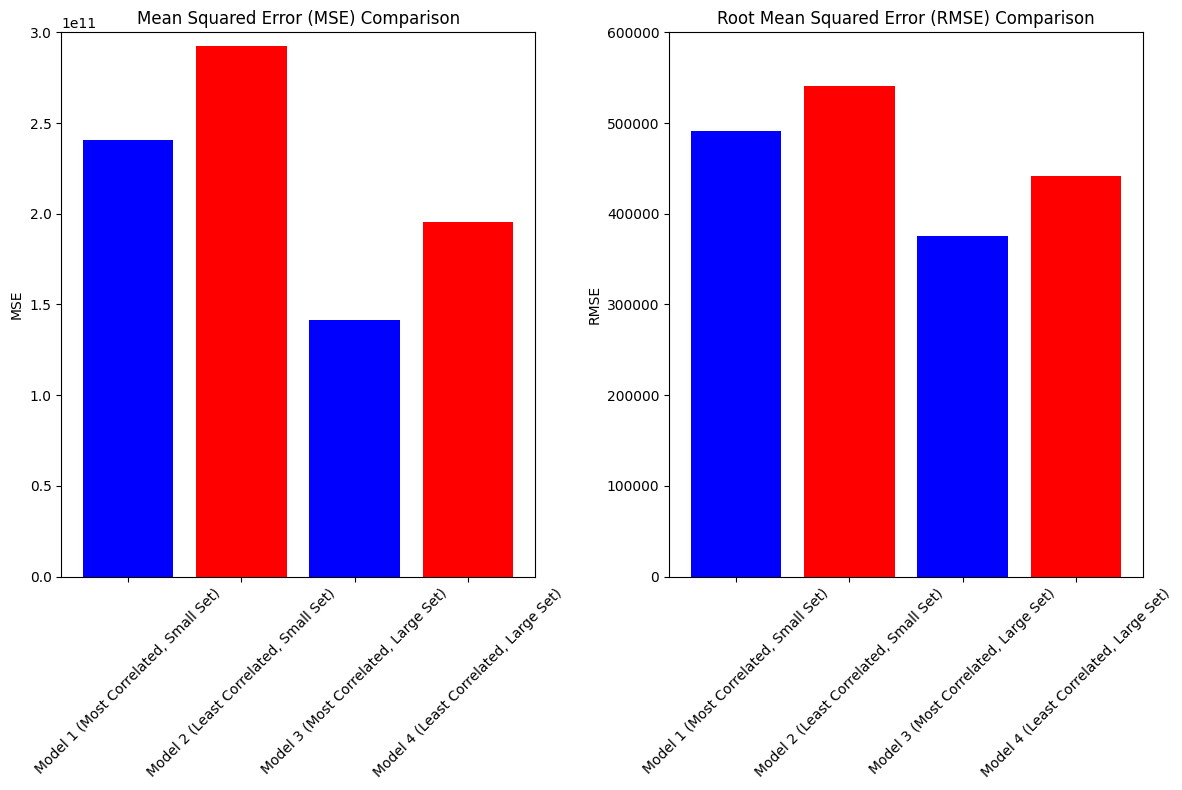

In [119]:


# I have collected the MSE and RMSE values from the models
mse_values = [240873725575.09454, 292715789614.6963, 141350876932.57748, 195254216561.59534]
rmse_values = [490788.8808592698, 541032.152108076, 375966.5901813318, 441875.7931382928]

# To provide Model labels
model_labels = [
    'Model 1 (Most Correlated, Small Set)', 
    'Model 2 (Least Correlated, Small Set)', 
    'Model 3 (Most Correlated, Large Set)', 
    'Model 4 (Least Correlated, Large Set)'
]

# To plot MSE
# I have first defined the figure size
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.bar(model_labels, mse_values, color=['blue', 'red', 'blue', 'red'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.ylim(0, 300000000000)  # To set limit based on MSE values
plt.xticks(rotation=45)

# Plot RMSE
plt.subplot(1, 2, 2)
plt.bar(model_labels, rmse_values, color=['blue', 'red', 'blue', 'red'])
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.ylim(0, 600000)  # To set limit based on RMSE values
plt.xticks(rotation=45)

plt.tight_layout()




# Visualization and Comparative Analysis of Model Performance

## Visualizing Results

Above are bar plots that demonstrate the *Mean Squared Error (MSE)* and *Root Mean Squared Error (RMSE)* across the four different models:

1. *Model 1*: Trained on most correlated features with a smaller training dataset.
2. *Model 2*: Trained on least correlated features with a smaller training dataset.
3. *Model 3*: Trained on most correlated features with a larger training dataset.
4. *Model 4*: Trained on least correlated features with a larger training dataset.

The visualization reveals that models using the *most correlated features* tend to perform better (lower MSE and RMSE) compared to models trained with *least correlated features. Similarly, models trained on *larger datasets* show improved performance.

---

## Insights and Analysis

### 1. *Correlation of Features and Model Performance*

- *Model 1* (most correlated features, small dataset) outperforms *Model 2* (least correlated features, small dataset) in terms of both MSE and RMSE.
- Similarly, *Model 3* (most correlated features, large dataset) achieves better performance than *Model 4* (least correlated features, large dataset).

This is consistent with the idea that features with a stronger relationship to the target variable—selling_price—lead to better predictive outcomes. The model is able to capture more meaningful patterns when using features that are highly correlated with the target.

---

### 2. *Effect of Training Data Size*

- Models trained on larger datasets (*Model 3* and *Model 4) consistently outperform their counterparts trained on smaller datasets (Model 1* and *Model 2*).
- The reduction in both MSE and RMSE for *Model 3* compared to *Model 1* supports the general machine learning principle that more data usually leads to improved generalization and better model accuracy.

---

### 3. *Unanticipated Patterns and Potential Causes*

Despite the expected trend—larger datasets and more correlated features generally yield better results—the gap between *Model 3* and *Model 4* is not as wide as might have been expected. Here are some potential reasons:

- *Model Limitations*: Since linear regression is a relatively simple model, it might not be flexible enough to capture non-linear relationships between features and the target variable, reducing performance gains from more data.
- *Feature Variability*: Features like km_driven or owner may have high variance or noise, which could limit the model’s predictive accuracy.
- *Underfitting: The smaller datasets might not provide enough information for the models to fully understand patterns in the data, leading to underfitting, especially in *Model 1* and *Model 2*.

---

## Conclusion

In general, the results align with expectations: models trained on more relevant features and larger datasets tend to perform better. However, the complexity of the model, the quality of the data, and the inherent noise in some features can influence the overall performance, demonstrating that feature selection and dataset size both play crucial roles in model success.

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


## Ethical Issues in Infographic Representation

A review of the infographic reveals multiple ethical concerns related to data representation:

- **Transparency**: The cited sources (Wolfe, 2015; Hardaway, 2008) are not immediately verifiable. Without accessible references, the reliability of the data comes into question, which compromises its credibility. Ethical data representation should always provide easily traceable sources to ensure accountability.

- **Bias in Data Selection**: The tables only focus on total and gold medals, leaving out other factors like population, GDP, or investment in sports. These elements could offer a more balanced perspective on national performance. Without considering such factors, the data may disproportionately highlight wealthier or larger nations, fostering an incomplete comparison.

- **Cultural Sensitivity**: Highlighting medal counts alone may diminish the accomplishments of countries with fewer resources, reinforcing a competition-based narrative that overlooks the spirit of participation, personal success, and the varying levels of opportunity different nations have to compete at this level. This emphasis on competition can inadvertently undervalue participation from less wealthy nations.

- **Inconsistent Visuals**: The differing sorting methods between total and gold medals may confuse viewers or manipulate perceptions of national success. While one metric (total medals) might favor the U.S., another (gold medals) benefits China. This inconsistency could be seen as selective presentation, skewing the narrative to suit different countries, which impacts viewer objectivity.

To address these concerns, the infographic should incorporate transparent sourcing, broader data considerations (including social and economic factors), and more consistent visuals to provide a balanced and ethical representation of Olympic performance. Additionally, a more holistic view could emphasize not only medal counts but also values such as sportsmanship, inclusivity, and equity in international competitions.
